In [1]:
cd /data/trungnv/Object_Detection/YOLOv5/

/data/trungnv/Object_Detection/YOLOv5


In [2]:
# !git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12269, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 12269 (delta 5), reused 8 (delta 1), pack-reused 12250
Receiving objects: 100% (12269/12269), 11.98 MiB | 10.96 MiB/s, done.
Resolving deltas: 100% (8491/8491), done.


In [2]:
# import zipfile as zf

# files = zf.ZipFile("train_data.zip",'r')
# files.extractall()
# files.close()

In [2]:
import torch
import os
from yolov5 import utils


In [3]:
os.environ['CUDA_VISIBLE_DEVICES']='1'
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

2022-06-22 10:08:29.047360: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [4]:
cd yolov5/

/data/trungnv/Object_Detection/YOLOv5/yolov5


In [5]:
display = utils.notebook_init()

YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.10.1+cu111 CUDA:0 (GeForce RTX 3090, 24268MiB)


Setup complete ✅ (48 CPUs, 125.6 GB RAM, 303.0/372.2 GB disk)


In [8]:
# Train YOLOv5
!python train.py --img 640 --batch 128 --epochs 50 --data custom_data.yaml --weights yolov5s.pt --cache
# !python train.py --img 640 --batch 32 --epochs 5 --data custom_data.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=128, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.10.1+cu111 CUDA:0 (GeForce RTX 3090, 24268MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=

               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        496        718      0.593      0.462      0.484      0.246

     Epoch   gpu_mem       box       obj       cls    labels  img_size
      6/49     22.9G   0.04698   0.02588   0.02182       193       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        496        718      0.571      0.461      0.477      0.242

     Epoch   gpu_mem       box       obj       cls    labels  img_size
      7/49     22.9G   0.04584   0.02435   0.01926       179       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        496        718      0.555      0.491      0.455      0.228

     Epoch   gpu_mem       box       obj       cls    labels  img_size
      8/49     22.9G    0.0443    0.0243   0.01815       178       640: 100%|███
               Class     Images     L


     Epoch   gpu_mem       box       obj       cls    labels  img_size
     31/49     22.9G   0.03587   0.02109  0.009546       164       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        496        718      0.793      0.833      0.857       0.55

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     32/49     22.9G   0.03573    0.0212  0.008484       167       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        496        718       0.83      0.857      0.889      0.589

     Epoch   gpu_mem       box       obj       cls    labels  img_size
     33/49     22.9G   0.03557   0.02092  0.008163       197       640: 100%|███
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all        496        718      0.785      0.841      0.854       0.55

     Epoch   gpu_mem       box      

In [16]:
%%time

!python detect.py --weights /data/trungnv/Object_Detection/YOLOv5/yolov5/runs/train/exp14/weights/best.pt --img 640 --conf 0.25 --source data/images/155620544344277-thumbnail.jpg

detect: weights=['/data/trungnv/Object_Detection/YOLOv5/yolov5/runs/train/exp14/weights/best.pt'], source=data/images/155620544344277-thumbnail.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.10.1+cu111 CUDA:0 (GeForce RTX 3090, 24268MiB)

Fusing layers... 
Model summary: 213 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /data/trungnv/Object_Detection/YOLOv5/yolov5/data/images/155620544344277-thumbnail.jpg: 416x640 1 military tank, Done. (0.013s)
Speed: 0.4ms pre-process, 12.8ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp12
CPU times: user 158 

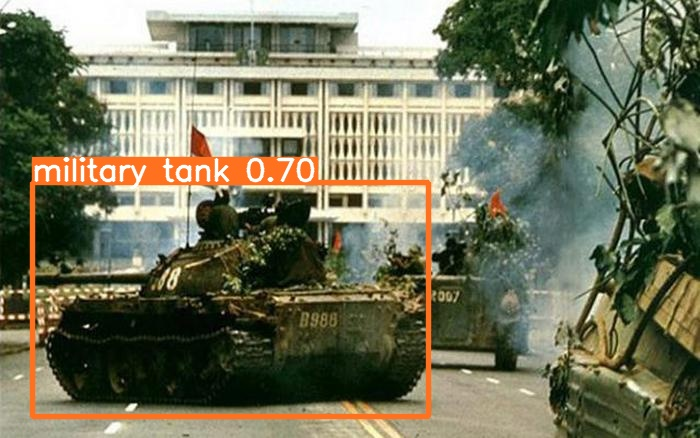

In [15]:
display.Image(filename='runs/detect/exp11/155620544344277-thumbnail.jpg', width=600)

In [19]:
%%time

!python detect.py --weights /data/trungnv/Object_Detection/YOLOv5/yolov5/runs/train/exp14/weights/best.pt \
        --img 640 --conf 0.25 --source data/images/cdc-tq-9817.jpeg

detect: weights=['/data/trungnv/Object_Detection/YOLOv5/yolov5/runs/train/exp14/weights/best.pt'], source=data/images/cdc-tq-9817.jpeg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.10.1+cu111 CUDA:0 (GeForce RTX 3090, 24268MiB)

Fusing layers... 
Model summary: 213 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /data/trungnv/Object_Detection/YOLOv5/yolov5/data/images/cdc-tq-9817.jpeg: 384x640 2 civilian aircrafts, 2 military aircrafts, Done. (0.024s)
Speed: 0.4ms pre-process, 24.0ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp14
CPU times: user 144

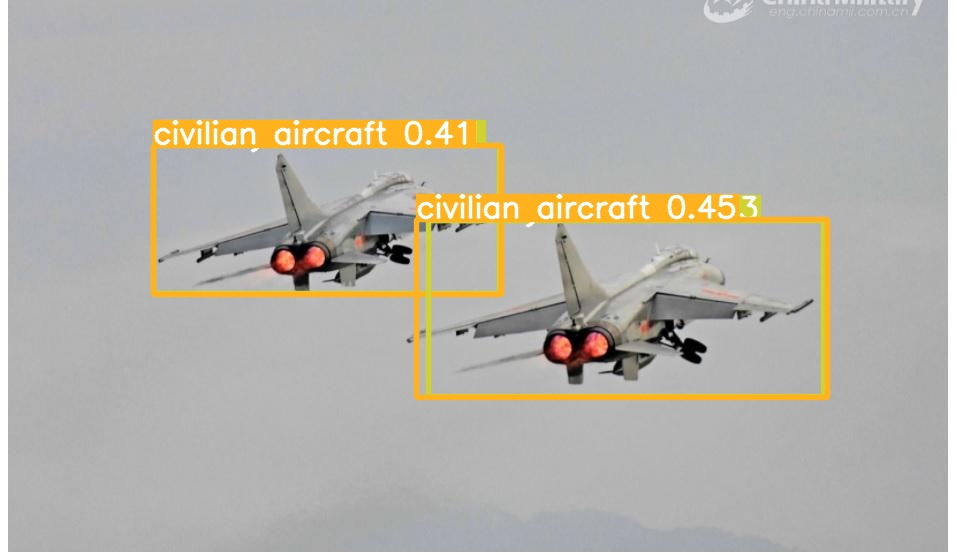

In [20]:
display.Image(filename='runs/detect/exp14/cdc-tq-9817.jpeg', width=600)

In [13]:
!python detect.py --weights data/trungnv/Object_Detection/YOLOv5/yolov5/runs/train/exp9/weights/best.pt --img 640 --conf 0.25 --source data/images/8.jpg
display.Image(filename='runs/detect/exp/8.jpg', width=600)

detect: weights=['/runs/train/exp9/weights/best.pt'], source=data/images/8.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.10.1+cu111 CUDA:0 (GeForce RTX 3090, 24268MiB)

Traceback (most recent call last):
  File "/data/trungnv/anaconda3/envs/my_env/lib/python3.7/pathlib.py", line 1273, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/runs/train/exp9/weights'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/data/trungnv/anaconda3/envs/my_env/lib/python3.7/pathlib.py", line 1273, in mkdir


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/exp/8.jpg'

In [12]:
!python detect.py --weights /runs/train/exp9/weights/best.pt --img 640 --conf 0.25 --source data/images/155620544344277-thumbnail.jpg
display.Image(filename='/yolov5/runs/detect/exp/dinhdoclap.jpg', width=600)

detect: weights=['/runs/train/exp9/weights/best.pt'], source=data/images/155620544344277-thumbnail.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-259-ga2a1ed2 Python-3.7.13 torch-1.10.1+cu111 CUDA:0 (GeForce RTX 3090, 24268MiB)

Traceback (most recent call last):
  File "/data/trungnv/anaconda3/envs/my_env/lib/python3.7/pathlib.py", line 1273, in mkdir
    self._accessor.mkdir(self, mode)
FileNotFoundError: [Errno 2] No such file or directory: '/runs/train/exp9/weights'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/data/trungnv/anaconda3/envs/my_env/lib/python3.7/pathlib.p

FileNotFoundError: [Errno 2] No such file or directory: '/yolov5/runs/detect/exp/dinhdoclap.jpg'